For mounting the data from google drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Import the necessary libraries: We start by importing the necessary libraries for this exercise. Pandas is a library providing high-performance, easy-to-use data structures and data analysis tools. NumPy is a library used for working with arrays. SimpleImputer is a class from the sklearn.impute module that provides basic strategies for imputing missing values.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. Load the dataset: The dataset is loaded into a pandas DataFrame using the read_csv function. This function is widely used in pandas to read a comma-separated values (csv) file into DataFrame.

In [31]:
df = pd.read_csv('/content/1dataset_csv.csv')
x=df.iloc[:,  :-1].values
y=df.iloc[:, -1].values
df.head()


,country,age,salary,purchased
0,france,44.0,72000.0,no
1,spain,27.0,48000.0,yes
2,germany,30.0,54000.0,no
3,spain,38.0,61000.0,no
4,germany,30.0,NaN,yes


In [32]:
df.tail()

,country,age,salary,purchased
5,france,35.0,58000.0,yes
6,spain,NaN,52000.0,no
7,france,48.0,79000.0,yes
8,germany,50.0,83000.0,no
9,france,37.0,67000.0,yes


3. Identify missing data: We identify missing data in the DataFrame using the isnull function followed by the sum function. This gives us the number of missing entries in each column. These missing entries are represented as NaN.

In [33]:
missing_data= df.isnull().sum()
#Print the number of missing entries in each column
print("missig values are: \n ", missing_data)

missig values are: 
  country      0
age          1
salary       1
purchased    0
dtype: int64


In [34]:
print(x)

[['france' 44.0 72000.0]
 ['spain' 27.0 48000.0]
 ['germany' 30.0 54000.0]
 ['spain' 38.0 61000.0]
 ['germany' 30.0 nan]
 ['france' 35.0 58000.0]
 ['spain' nan 52000.0]
 ['france' 48.0 79000.0]
 ['germany' 50.0 83000.0]
 ['france' 37.0 67000.0]]


In [35]:
print(y)

['no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes']


5. Configure an instance of the SimpleImputer class: We create an instance of the SimpleImputer class. This class is a part of the sklearn.impute module and provides basic strategies for imputing missing values. We configure it to replace missing values (represented as np.nan) with the mean value of the column.

6. Fit the imputer on the DataFrame: We fit the imputer on the DataFrame using the fit method. This method calculates the imputation values (in this case, the mean of each column) that will be used to replace the missing data.

7. Apply the transform to the DataFrame: We apply the transform to the DataFrame using the transform method. This method replaces missing data with the imputation values calculated by the fit method.

What is imputing in data science?

---


Data imputation is a method for retaining the majority of the dataset's data and information by substituting missing data with a different value. These methods are employed because it would be impractical to remove data from a dataset each time.

In [36]:
from sklearn.impute import SimpleImputer
#SimpleImputer is a class-------and imputer is object of it ------then we call class
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 1:3])
x[:, 1:3]=imputer.transform(x[:, 1:3])

 Print the updated matrix of features: Finally, we print out the updated matrix of features to verify that the missing data has been successfully replaced.

In [37]:
print(x)

[['france' 44.0 72000.0]
 ['spain' 27.0 48000.0]
 ['germany' 30.0 54000.0]
 ['spain' 38.0 61000.0]
 ['germany' 30.0 63777.77777777778]
 ['france' 35.0 58000.0]
 ['spain' 37.666666666666664 52000.0]
 ['france' 48.0 79000.0]
 ['germany' 50.0 83000.0]
 ['france' 37.0 67000.0]]


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough') # here [0] is country index the column that we wanted to be change
x= np.array(ct.fit_transform(x))



In [39]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 30.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 37.666666666666664 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


# Dependent variable encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()           #not write y because there is one column y
y= le.fit_transform(y)       #here we not need array of numpy because one column

In [41]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


# Spliting the dataset into the training and testing set.

In [42]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,random_state = 1)

In [52]:
print(x_train)

[[0.0 0.0 1.0 37.666666666666664 52000.0]
 [0.0 1.0 0.0 30.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [53]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [54]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [55]:
print(y_test)

[0 1]


# work with Iris_dataset

1. Import necessary libraries. Begin by importing all the necessary libraries - pandas for data manipulation, train_test_split for splitting our dataset into training and test sets, and StandardScaler for feature scaling.

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
2. Load the Iris dataset. Load the Iris dataset using the `pd.read_csv` function from pandas. The dataset is read directly from a CSV file named 'iris.csv'. This file is assumed to be in the same directory as the script. The dataset is stored in a pandas DataFrame for easier manipulation

In [58]:
# Load the Iris dataset using pd.read_csv
iris_df = pd.read_csv('/content/Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
x_iris= iris_df.drop('Species',axis=1)
y_iris= iris_df['Species']
print(x_iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [63]:
print(y_iris)


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [64]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Split the iris_dataset into 80-20 traning and testing set

In [65]:
x_iris_train,x_iris_test,y_iris_train,y_iris_test= train_test_split(x_iris,y_iris,test_size=0.2,random_state=42)

# Apply feature scaling on iris_dataset


  The StandardScaler is applied to standardize the features to have a mean=0 and variance=1. The scaler is fitted on the training set and then used to transform both the training and test sets. This is to prevent information leak from the test set into the training set.

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_iris_train)
X_test = scaler.transform(x_iris_test)

In [69]:
# Print scaled training and test sets
print("Scaled Training Set:")
print(x_iris_train)
print("\nScaled Test Set:")
print(x_iris_test)

Scaled Training Set:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22    23            4.6           3.6            1.0           0.2
15    16            5.7           4.4            1.5           0.4
65    66            6.7           3.1            4.4           1.4
11    12            4.8           3.4            1.6           0.2
42    43            4.4           3.2            1.3           0.2
..   ...            ...           ...            ...           ...
71    72            6.1           2.8            4.0           1.3
106  107            4.9           2.5            4.5           1.7
14    15            5.8           4.0            1.2           0.2
92    93            5.8           2.6            4.0           1.2
102  103            7.1           3.0            5.9           2.1

[120 rows x 5 columns]

Scaled Test Set:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73    74            6.1           2.8            4.7           1.2

1. Importing the necessary libraries. Import pandas for data manipulation, numpy for numerical operations, and the necessary classes from scikit-learn for preprocessing.

In [70]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

2. Load the dataset. The Titanic dataset is loaded into a pandas DataFrame from a CSV file.

In [71]:
# Load the dataset
df = pd.read_csv('/content/titanic_dataset.csv')
percent_to_use = 0.20
df = df.sample(frac=percent_to_use, random_state=42)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [72]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


3. Identify the categorical data. Specify which features in our dataset are categorical. In this case, 'Sex', 'Embarked', and 'Pclass' are the categorical features.

In [73]:
# Identify the categorical data
categorical_features = ['Sex', 'Embarked', 'Pclass']

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

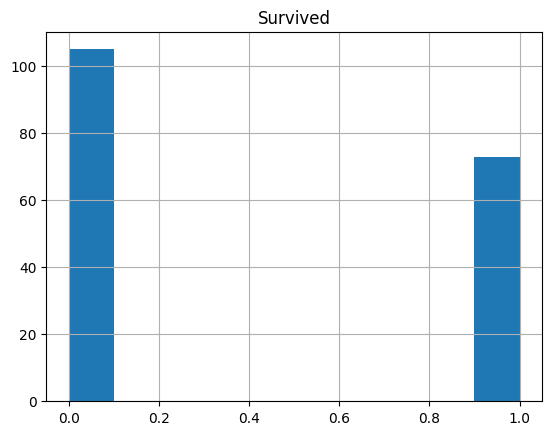

In [81]:
df.hist(column='Survived')

# Apply scatter plot between Survived and Age columns

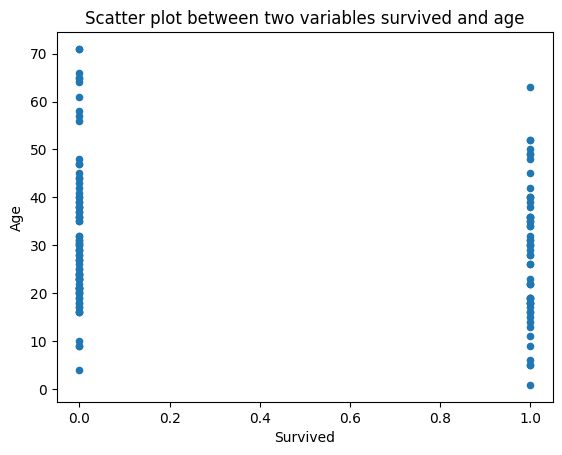

In [83]:
import matplotlib.pyplot as plot
df.plot.scatter(x='Survived',y='Age',title= "Scatter plot between two variables survived and age")
plot.show(block=True)

# Calculate corelation between two columns

In [84]:
print(df['Survived'].corr(df['Age']))

-0.13441876563846208


T***he correlation coefficient of -0.13441876563846208 indicates a weak correlation between two columns in machine learning.*** Here's a breakdown of how correlation coefficients are interpreted in machine learning:

Weak correlation (|r| < 0.2): There is a very weak or negligible relationship between the two variables.
Moderate correlation (0.2 <= |r| < 0.5): There is a weak to moderate relationship between the two variables.
Strong correlation (|r| >= 0.5): There is a strong relationship between the two variables.
It's important to note that correlation doesn't imply causation, meaning that just because two variables are correlated doesn't necessarily mean that one variable causes the other to change.

# finding outliears from dataset

In [86]:
quartiles = df['Age'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

19.0


4. Implement an instance of the ColumnTransformer clas. Initialize a ColumnTransformer that will apply a OneHotEncoder to the categorical features. The remainder='passthrough' argument ensures that the non-transformed features are not discarded.

In [74]:
# Implement an instance of the ColumnTransformer class
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')

5. Apply the fit_transform method. Fit the ColumnTransformer to our DataFrame and transform the data. This applies one-hot encoding to our categorical features, converting them into numerical data suitable for a machine-learning model.

In [75]:
# Apply the fit_transform method on the instance of ColumnTransformer
X = ct.fit_transform(df)


6. Convert the output into a NumPy array. Convert the output to a NumPy array: The output of the ColumnTransformer is a sparse matrix - convert this to a dense NumPy array for easier manipulation.

In [49]:
# Convert the output into a NumPy array
X = np.array(X)

7. Use LabelEncoder to encode binary categorical data. The 'Survived' feature is our dependent variable. Since it is a binary categorical feature, we use LabelEncoder to transform it into numerical data.

In [79]:
# Use LabelEncoder to encode binary categorical data
le = LabelEncoder()
y = le.fit_transform(df['Survived'])
print(y)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1]


8. Print the transformed feature matrix and dependent variable vector to verify that our preprocessing steps have been applied correctly.

In [51]:
# Print the updated matrix of features and the dependent variable vector
print("Updated matrix of features: \n", X)
print("Updated dependent variable vector: \n", y)


Updated matrix of features: 
 [[0.0 1.0 0.0 ... 'A/5 21171' 7.25 nan]
 [1.0 0.0 1.0 ... 'PC 17599' 71.2833 'C85']
 [1.0 0.0 0.0 ... 'STON/O2. 3101282' 7.925 nan]
 ...
 [1.0 0.0 0.0 ... 'W./C. 6607' 23.45 nan]
 [0.0 1.0 1.0 ... '111369' 30.0 'C148']
 [0.0 1.0 0.0 ... '370376' 7.75 nan]]
Updated dependent variable vector: 
 [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 